In [32]:
# Import necessary libraries for data handling, machine learning, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
# --- 1. Data Loading and Preprocessing ---

# Load the dataset from the CSV file into a pandas DataFrame
# This dataset contains features of different dry bean varieties.
try:
    df = pd.read_csv("Dry_Bean.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Dry_Bean.csv' not found. Please make sure the file is in the correct directory.")
    exit()


# Separate the features (X) from the target variable (y)
# 'Class' is the column we want to predict. All other columns are features.
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets.
# 30% of the data will be used for testing, and 70% for training.
# random_state ensures that the split is the same every time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

Dataset loaded successfully.


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11380,30210,651.194,254.800257,151.387457,1.683100,0.804360,30507,196.123855,0.788608,0.990265,0.895241,0.769716,0.008434,0.001826,0.592463,0.997174
10592,26989,603.446,209.236366,164.968662,1.268340,0.615122,27389,185.373844,0.724887,0.985396,0.931365,0.885954,0.007753,0.002946,0.784915,0.995539
3130,79508,1120.351,410.471774,248.306459,1.653085,0.796279,80728,318.170913,0.706889,0.984888,0.795999,0.775135,0.005163,0.001150,0.600834,0.993230
5861,47394,880.106,365.540272,165.751428,2.205352,0.891286,48081,245.649985,0.624921,0.985712,0.768888,0.672019,0.007713,0.000970,0.451609,0.995958
3405,145339,1465.758,543.258451,342.468755,1.586301,0.776273,147256,430.175967,0.695958,0.986982,0.850095,0.791844,0.003738,0.000906,0.627017,0.994638


In [25]:
# --- 2. Feature Scaling ---

# Scale the features using StandardScaler.
# This is important for distance-based algorithms like k-NN, as it ensures
# that all features contribute equally to the distance calculations.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on the training data

# Convert X_test_scaled back to a pandas DataFrame to use the .head() method
# It's important to keep the original column names for clarity.
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the head of the scaled test data DataFrame
print("Head of X_test_scaled DataFrame:")
X_test_scaled_df.head()

Head of X_test_scaled DataFrame:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.365050,-0.532187,-0.698899,0.114115,-1.334541,-1.604000,-0.372437,-0.352376,0.442600,1.062360,1.602239,1.503880,-0.372608,1.156044,1.548297,0.983587
1,0.518745,1.088442,0.584156,0.795151,-0.109182,0.166461,0.551415,0.705123,0.370767,-3.100541,-2.511168,-0.060888,-1.009651,-0.624294,-0.099001,-1.981214
2,-0.517978,-0.683791,-0.835964,-0.174416,-1.240986,-1.402148,-0.521753,-0.565837,-0.099553,0.649395,1.244838,1.364448,-0.003104,1.266253,1.393875,0.722364
3,-0.678752,-0.965133,-1.137649,-0.277448,-1.668693,-2.497817,-0.684879,-0.804379,0.417645,1.251135,1.976768,2.004227,0.131280,2.171148,2.114731,1.002347
4,-0.788527,-0.968933,-0.960769,-0.917814,-0.436385,-0.169860,-0.787559,-0.977152,0.730536,-0.037940,0.398945,0.348636,1.221056,0.861107,0.313946,0.105025


In [26]:
# --- 3. Model Training ---

# Initialize and train the k-NN model with k=3
print("\nTraining 3-NN model...")
knn3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn3.fit(X_train_scaled, y_train)
print("3-NN model trained.")

# Initialize and train the k-NN model with k=5
print("Training 5-NN model...")
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(X_train_scaled, y_train)
print("5-NN model trained.")


Training 3-NN model...
3-NN model trained.
Training 5-NN model...
5-NN model trained.


In [27]:
# --- 4. Model Prediction ---

# Make predictions on the scaled test data for both models
y_pred3 = knn3.predict(X_test_scaled)
y_pred5 = knn5.predict(X_test_scaled)
print("\nPredictions generated for both models.")


Predictions generated for both models.


In [28]:
# --- 5. Model Evaluation ---

# Calculate and print the accuracy scores
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy5 = accuracy_score(y_test, y_pred5)

print("\n--- Overall Model Accuracy ---")
print(f"Accuracy of 3-NN model: {accuracy3:.4f}")
print(f"Accuracy of 5-NN model: {accuracy5:.4f}")
print("-" * 30)

# Generate and print the detailed classification report for the 3-NN model
print("\n--- Classification Report for 3-NN (k=3) ---")
print(classification_report(y_test, y_pred3))

# Generate and print the detailed classification report for the 5-NN model
print("\n--- Classification Report for 5-NN (k=5) ---")
print(classification_report(y_test, y_pred5))


--- Overall Model Accuracy ---
Accuracy of 3-NN model: 0.9153
Accuracy of 5-NN model: 0.9216
------------------------------

--- Classification Report for 3-NN (k=3) ---
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.88      0.90       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.91      0.95      0.93       479
    DERMASON       0.89      0.91      0.90      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.94       619
        SIRA       0.86      0.86      0.86       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084


--- Classification Report for 5-NN (k=5) ---
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92

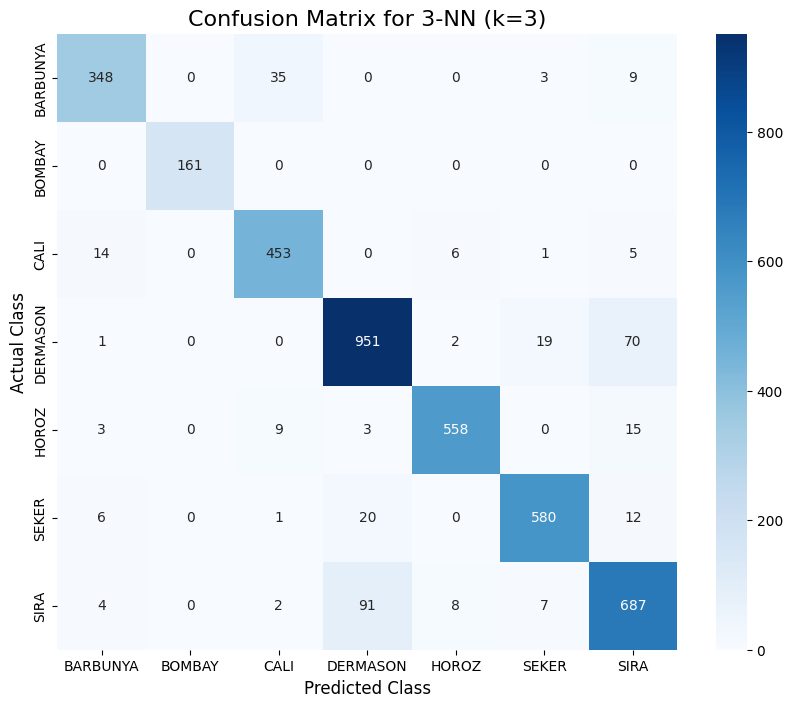


Displaying Confusion Matrix for 3-NN model...


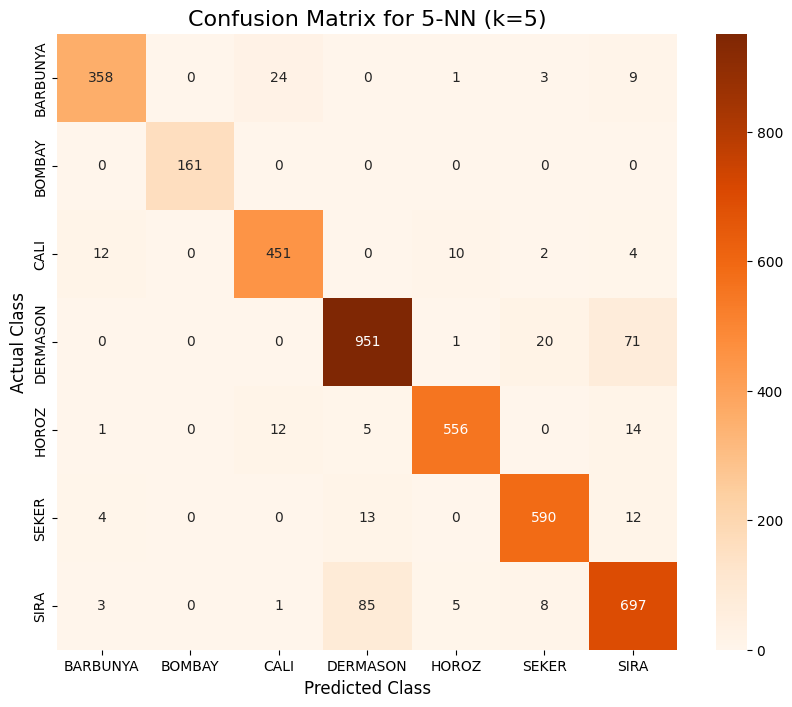

Displaying Confusion Matrix for 5-NN model...


In [29]:
# --- 6. Visualization ---

# Get the class names for labeling the confusion matrix plots
class_names = knn3.classes_

# Generate the confusion matrix for the 3-NN model
cm3 = confusion_matrix(y_test, y_pred3)

# Create a heatmap for the 3-NN confusion matrix for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for 3-NN (k=3)', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()
print("\nDisplaying Confusion Matrix for 3-NN model...")


# Generate the confusion matrix for the 5-NN model
cm5 = confusion_matrix(y_test, y_pred5)

# Create a heatmap for the 5-NN confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for 5-NN (k=5)', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()
print("Displaying Confusion Matrix for 5-NN model...")

In [34]:
from sklearn.metrics import accuracy_score

k_loop = range(1,50)
accuracy_score = []

for k in k_loop:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score.append(accuracy_score)

TypeError: 'list' object is not callable

In [ ]:
plt.plot(k_loop,accuracy_score)